## Introduction to Credit card Fraud Detection

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
The data sets contains transactions made by credit cards by cardholders. This dataset we have found 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the frauds account for 0.172% of all transactions.

### Objective: In this notebook, given the credit card transactions, I builded Logistic Regression and Random Forest Machine learning model to compare Accuracy score. Both Algorithm are giving best accuracy score.

### This notebooks covers,

Importing packages
loading dataset
Exploratory data analysis
Splitting data from train and test
finding and fixing imbalanced dataset using Over_ sampling (SMOTE)
Creating a Model - Logistic Regression and Random Forest
Evaluation

### Dataset Description:

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features and more background information about the data is not provided. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

The value 1 is for fraudulent transactions, value 0 is for nonfraudulent transactions.

Source: https://www.kaggle.com/mlg-ulb/creditcardfraud



In [1]:
#importing packeges
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('creditcard.csv')

# Exploratory data analysis

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [8]:
## count the occurance of unique values in class column
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

C:\Users\sudar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


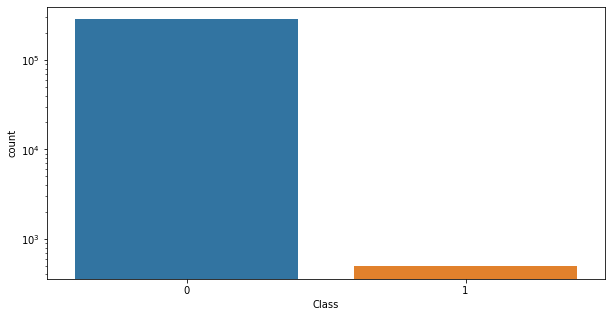

In [9]:
## countplot of classes
plt.figure(figsize=(10, 5))
sns.countplot(df['Class'], log=True);

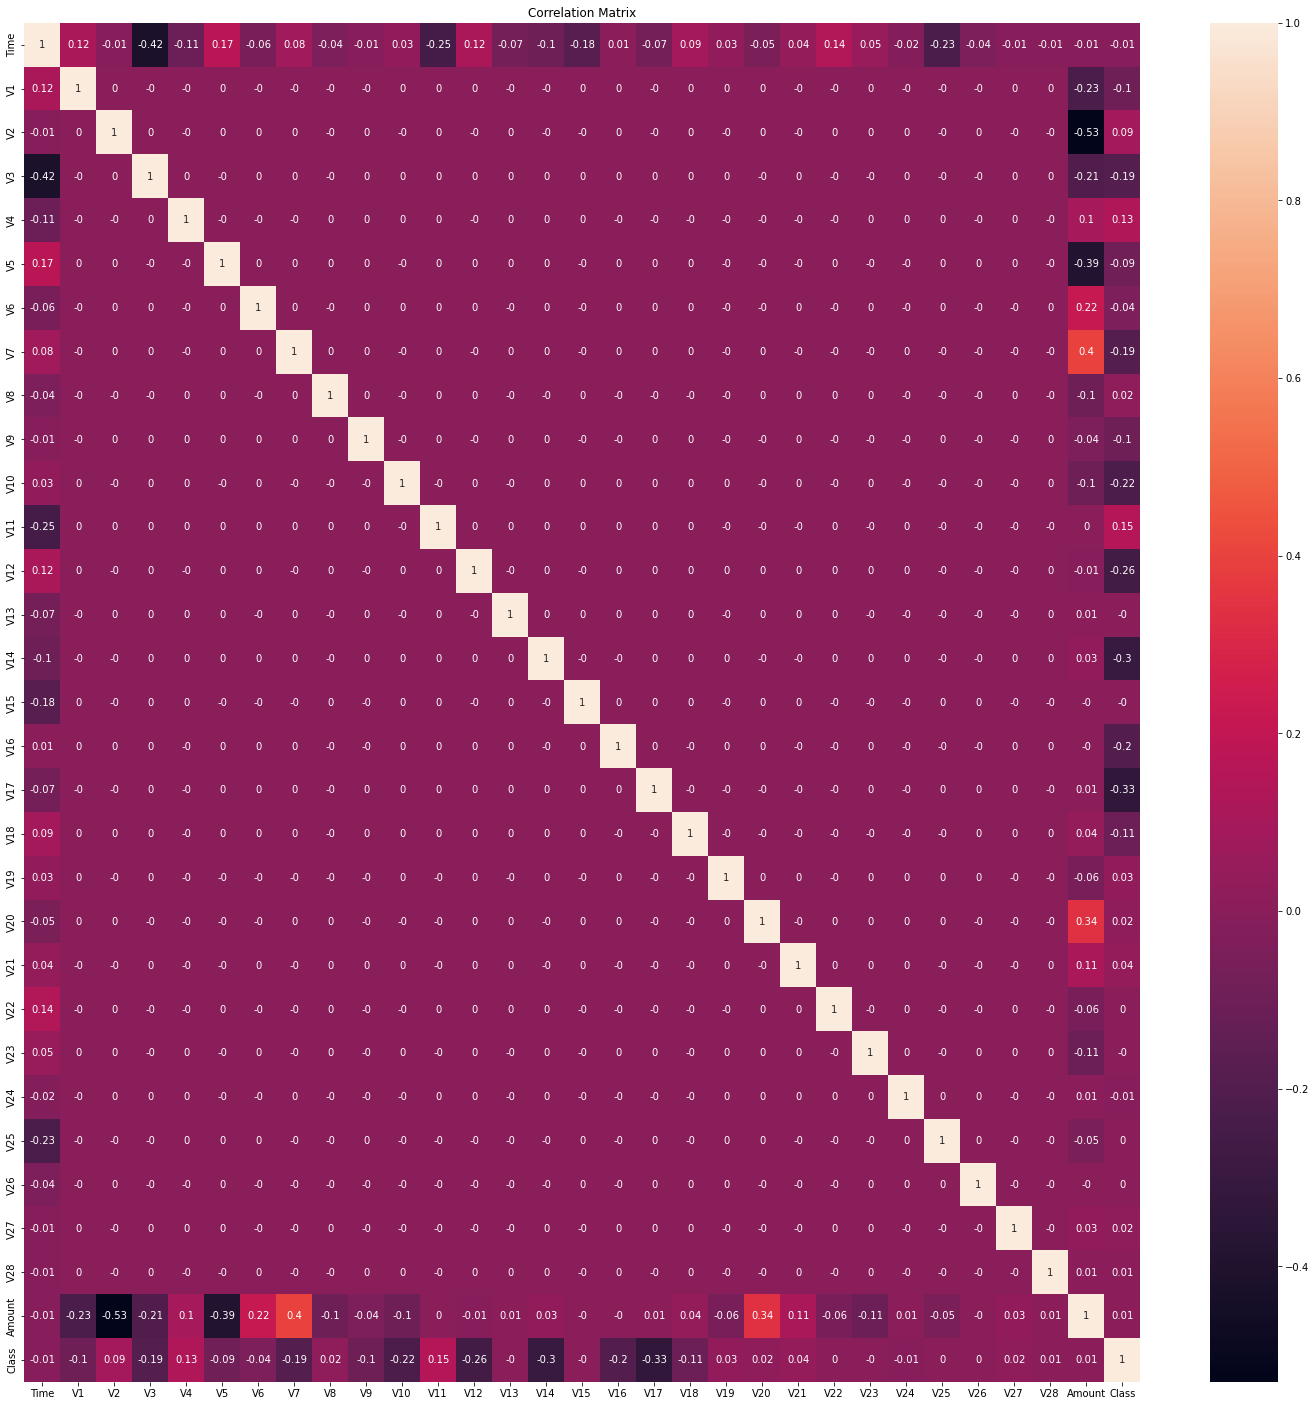

In [10]:
## checking correlation
plt.figure(figsize=(25,25))
plt.title("Correlation Matrix")
sns.heatmap(round(df.corr(), 2), annot=True);

In [11]:
df.corr

<bound method DataFrame.corr of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [12]:
df.shape

(284807, 31)

In [13]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [14]:
df.groupby(['Class']).count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


## Splitting the data for train and test

In [15]:
x = df.drop(['Time','Class'],axis=1)
y =df.iloc[:,-1]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression()

In [20]:
print(x_test.shape)
print(x_train.shape)

(71202, 29)
(213605, 29)


In [21]:
model.fit(x_train,y_train)

C:\Users\sudar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred = model.predict(x_test)

In [23]:
model.score(x_test,y_test)

0.9992556388865481

In [24]:
model.score(x_train,y_train)

0.9991573230963695

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [30]:
print('classification report : \n',classification_report(y_test,y_pred))
print('Accuracy_score:', accuracy_score(y_test,y_pred))

classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.89      0.64      0.74       120

    accuracy                           1.00     71202
   macro avg       0.94      0.82      0.87     71202
weighted avg       1.00      1.00      1.00     71202

Accuracy_score: 0.9992556388865481


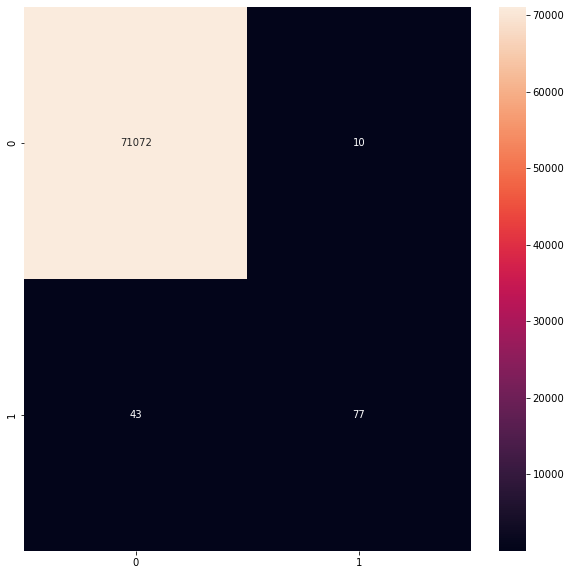

In [32]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g');

#### This dataset we have found 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the frauds account for 0.172% of all transactions. 
#### Class '0' is perfectly classified but it is not able to classify class '1' perfeclty. Because it is imbalanced dataset. To fix imbalanced dataset used over_sampling method with SMOTE

In [33]:
!pip install imblearn

Text(0, 0.5, 'Frequency')

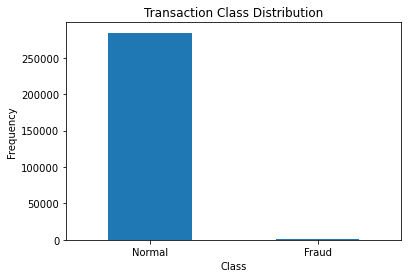

In [35]:
LABELS= ('Normal','Fraud')
count_classes = pd.value_counts(df['Class'],sort=True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [36]:
## Get the fraud and normal dataset

fraud = df[df['Class']==1]
normal = df[df['Class']==0]

In [37]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [38]:
!pip install imblearn

In [39]:
from sklearn.metrics import DistanceMetric as _DistanceMetric

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
upsample = SMOTE()

In [42]:
x,y = upsample.fit_resample(x,y)

In [43]:
from collections import Counter

In [44]:
count = Counter(y)

In [45]:
print('Resampled datasets shape{}'.format(count))

Resampled datasets shapeCounter({0: 284315, 1: 284315})


In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

### Normalization

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
std = StandardScaler()

In [49]:
x_train = std.fit_transform(x_train)
x_test = std.fit_transform(x_test)

In [50]:
model.fit(x_train,y_train)

C:\Users\sudar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
model.score(x_train, y_train)

0.9598215123149937

In [52]:
model.score(x_test,y_test)

0.9590033624558589

In [53]:
y_pred = model.predict(x_test)

In [56]:
print('classification report: \n', classification_report(y_test,y_pred))
print('Accuracy score : ', accuracy_score(y_pred,y_test))
print('confusion matrix: \n', confusion_matrix(y_test,y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     70856
           1       0.98      0.94      0.96     71302

    accuracy                           0.96    142158
   macro avg       0.96      0.96      0.96    142158
weighted avg       0.96      0.96      0.96    142158

Accuracy score :  0.9590033624558589
confusion matrix: 
 [[69661  1195]
 [ 4633 66669]]


<AxesSubplot:>

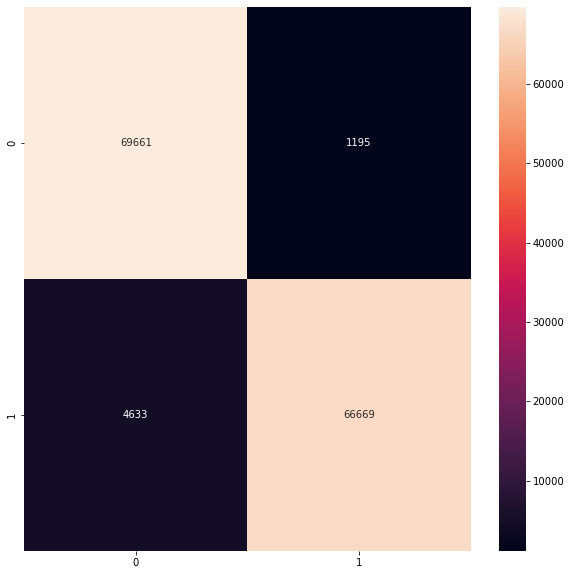

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='g')

## Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
RFC = RandomForestClassifier(criterion='gini')

In [63]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [64]:
y_pred = RFC.predict(x_test)

In [65]:
RFC.score(x_test,y_test)

0.994674939152211

In [66]:
RFC.score(x_train,y_train)

1.0

In [67]:
print('classification report: \n', classification_report(y_test,y_pred))
print('Accuracy score : ', accuracy_score(y_pred,y_test))
print('confusion matrix: \n', confusion_matrix(y_test,y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     70856
           1       1.00      0.99      0.99     71302

    accuracy                           0.99    142158
   macro avg       0.99      0.99      0.99    142158
weighted avg       0.99      0.99      0.99    142158

Accuracy score :  0.994674939152211
confusion matrix: 
 [[70836    20]
 [  737 70565]]


<AxesSubplot:>

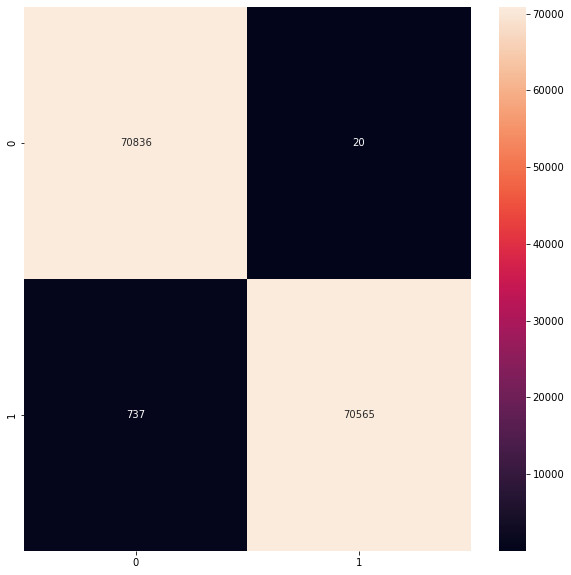

In [68]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='g')